In [0]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Gerando clientes.csv
clientes = pd.DataFrame({
    'id_cliente': range(1, 21),
    'nome': [f'Cliente {i}' for i in range(1, 21)],
    'cidade': np.random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'], 20),
    'idade': np.random.randint(18, 60, 20),
    'data_cadastro': [datetime.today() - timedelta(days=np.random.randint(30, 365)) for _ in range(20)]
})

# Gerando produtos.csv
produtos = pd.DataFrame({
    'id_produto': range(1, 21),
    'nome': [f'Produto {i}' for i in range(1, 21)],
    'categoria': np.random.choice(['Jogos', 'Acessórios', 'Hardware', 'Software'], 20),
    'preco': np.round(np.random.uniform(50, 500, 20), 2)
})

# Gerando vendas.csv
vendas = pd.DataFrame({
    'id_venda': range(1, 101),
    'id_cliente': np.random.choice(clientes['id_cliente'], 100),
    'id_produto': np.random.choice(produtos['id_produto'], 100),
    'quantidade': np.random.randint(1, 5, 100),
    'data_venda': [datetime.today() - timedelta(days=np.random.randint(0, 180)) for _ in range(100)]
})

# Salvando os arquivos CSV
clientes.to_csv('clientes.csv', index=False)
produtos.to_csv('produtos.csv', index=False)
vendas.to_csv('vendas.csv', index=False)

clientes.head(), produtos.head(), vendas.head()


(   id_cliente       nome          cidade  idade              data_cadastro
 0           1  Cliente 1  Belo Horizonte     30 2025-04-28 13:45:55.482032
 1           2  Cliente 2        Curitiba     23 2024-09-30 13:45:55.482060
 2           3  Cliente 3  Belo Horizonte     50 2025-01-16 13:45:55.482072
 3           4  Cliente 4        Curitiba     21 2024-11-24 13:45:55.482080
 4           5  Cliente 5  Belo Horizonte     29 2025-05-04 13:45:55.482088,
    id_produto       nome   categoria   preco
 0           1  Produto 1  Acessórios   60.27
 1           2  Produto 2       Jogos  300.76
 2           3  Produto 3    Software  200.63
 3           4  Produto 4    Software   82.13
 4           5  Produto 5    Hardware  325.60,
    id_venda  id_cliente  id_produto  quantidade                 data_venda
 0         1           6          17           2 2025-07-27 13:45:55.485258
 1         2          13          17           4 2025-04-19 13:45:55.485277
 2         3          14          19  

In [0]:
# Informações gerais sobre tipos de dados e nulos
clientes.info()
produtos.info()
vendas.info()

# Estatísticas básicas das colunas numéricas
clientes.describe()
produtos.describe()
vendas.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_cliente     20 non-null     int64         
 1   nome           20 non-null     object        
 2   cidade         20 non-null     object        
 3   idade          20 non-null     int64         
 4   data_cadastro  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_produto  20 non-null     int64  
 1   nome        20 non-null     object 
 2   categoria   20 non-null     object 
 3   preco       20 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10

,id_venda,id_cliente,id_produto,quantidade
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,11.120000,9.780000,2.600000
std,29.011492,5.730091,5.407776,1.154701
min,1.000000,1.000000,1.000000,1.000000
25%,25.750000,6.000000,5.000000,2.000000
50%,50.500000,12.000000,10.000000,3.000000
75%,75.250000,15.250000,15.000000,4.000000
max,100.000000,20.000000,19.000000,4.000000


In [0]:
clientes.duplicated().sum()
produtos.duplicated().sum()
vendas.duplicated().sum()


0

In [0]:
# Merge vendas + clientes
vendas_clientes = pd.merge(vendas, clientes, left_on='id_cliente', right_on='id_cliente', how='left')

# Merge com produtos
vendas_clientes_produtos = pd.merge(vendas_clientes, produtos, left_on='id_produto', right_on='id_produto', how='left')

# Visualizar resultado
vendas_clientes_produtos.head()

,id_venda,id_cliente,id_produto,quantidade,data_venda,nome_x,cidade,idade,data_cadastro,nome_y,categoria,preco
0,1,6,17,2,2025-07-27 13:45:55.485258,Cliente 6,Curitiba,45,2024-10-17 13:45:55.482097,Produto 17,Jogos,325.17
1,2,13,17,4,2025-04-19 13:45:55.485277,Cliente 13,São Paulo,42,2025-04-28 13:45:55.482220,Produto 17,Jogos,325.17
2,3,14,19,1,2025-05-21 13:45:55.485287,Cliente 14,Curitiba,25,2024-09-03 13:45:55.482236,Produto 19,Acessórios,336.82
3,4,17,9,1,2025-03-05 13:45:55.485295,Cliente 17,São Paulo,57,2024-10-23 13:45:55.482260,Produto 9,Acessórios,221.56
4,5,9,3,4,2025-05-25 13:45:55.485302,Cliente 9,Rio de Janeiro,35,2024-11-17 13:45:55.482155,Produto 3,Software,200.63


In [0]:
# Renomeando as colunas
vendas_clientes_produtos = vendas_clientes_produtos.rename(columns={
    'nome_x': 'nome_cliente',
    'nome_y': 'nome_produto'
})

# Conferir resultado
vendas_clientes_produtos.head()


,id_venda,id_cliente,id_produto,quantidade,data_venda,nome_cliente,cidade,idade,data_cadastro,nome_produto,categoria,preco
0,1,6,17,2,2025-07-27 13:45:55.485258,Cliente 6,Curitiba,45,2024-10-17 13:45:55.482097,Produto 17,Jogos,325.17
1,2,13,17,4,2025-04-19 13:45:55.485277,Cliente 13,São Paulo,42,2025-04-28 13:45:55.482220,Produto 17,Jogos,325.17
2,3,14,19,1,2025-05-21 13:45:55.485287,Cliente 14,Curitiba,25,2024-09-03 13:45:55.482236,Produto 19,Acessórios,336.82
3,4,17,9,1,2025-03-05 13:45:55.485295,Cliente 17,São Paulo,57,2024-10-23 13:45:55.482260,Produto 9,Acessórios,221.56
4,5,9,3,4,2025-05-25 13:45:55.485302,Cliente 9,Rio de Janeiro,35,2024-11-17 13:45:55.482155,Produto 3,Software,200.63


In [0]:
# Criação de um novo DataFrame apenas para as vendas da cidade de São Paulo
vendas_sp = vendas_clientes_produtos[vendas_clientes_produtos['cidade'] == 'São Paulo']

# Visualização
vendas_sp.head()

,id_venda,id_cliente,id_produto,quantidade,data_venda,nome_cliente,cidade,idade,data_cadastro,nome_produto,categoria,preco
1,2,13,17,4,2025-04-19 13:45:55.485277,Cliente 13,São Paulo,42,2025-04-28 13:45:55.482220,Produto 17,Jogos,325.17
3,4,17,9,1,2025-03-05 13:45:55.485295,Cliente 17,São Paulo,57,2024-10-23 13:45:55.482260,Produto 9,Acessórios,221.56
19,20,18,7,2,2025-06-07 13:45:55.485532,Cliente 18,São Paulo,57,2024-12-16 13:45:55.482268,Produto 7,Acessórios,495.62
20,21,13,15,1,2025-04-20 13:45:55.485539,Cliente 13,São Paulo,42,2025-04-28 13:45:55.482220,Produto 15,Hardware,125.88
21,22,17,12,2,2025-03-11 13:45:55.485547,Cliente 17,São Paulo,57,2024-10-23 13:45:55.482260,Produto 12,Jogos,265.85


In [0]:
# Criação de um novo DataFrame apenas para as vendas da categoria Jogos.
vendas_jogos = vendas_clientes_produtos[vendas_clientes_produtos['categoria'] == 'Jogos']

# Visualização
vendas_jogos.head()

,id_venda,id_cliente,id_produto,quantidade,data_venda,nome_cliente,cidade,idade,data_cadastro,nome_produto,categoria,preco
0,1,6,17,2,2025-07-27 13:45:55.485258,Cliente 6,Curitiba,45,2024-10-17 13:45:55.482097,Produto 17,Jogos,325.17
1,2,13,17,4,2025-04-19 13:45:55.485277,Cliente 13,São Paulo,42,2025-04-28 13:45:55.482220,Produto 17,Jogos,325.17
9,10,10,2,3,2025-05-21 13:45:55.485383,Cliente 10,Belo Horizonte,43,2025-06-03 13:45:55.482170,Produto 2,Jogos,300.76
15,16,1,12,3,2025-06-27 13:45:55.485502,Cliente 1,Belo Horizonte,30,2025-04-28 13:45:55.482032,Produto 12,Jogos,265.85
16,17,20,17,4,2025-05-23 13:45:55.485509,Cliente 20,Rio de Janeiro,29,2024-10-06 13:45:55.482282,Produto 17,Jogos,325.17


In [0]:
# DataFrame extraindo somente colunas específicas.
vendas_info = vendas_clientes_produtos[['nome_cliente', 'nome_produto', 'quantidade', 'data_venda']]

# Visualização
vendas_info.head()

,nome_cliente,nome_produto,quantidade,data_venda
0,Cliente 6,Produto 17,2,2025-07-27 13:45:55.485258
1,Cliente 13,Produto 17,4,2025-04-19 13:45:55.485277
2,Cliente 14,Produto 19,1,2025-05-21 13:45:55.485287
3,Cliente 17,Produto 9,1,2025-03-05 13:45:55.485295
4,Cliente 9,Produto 3,4,2025-05-25 13:45:55.485302


In [0]:
# DataFrame apenas para as vendas da cidade Belo Horizonte.
vendas_bh = vendas_clientes_produtos[vendas_clientes_produtos['cidade'] == 'Belo Horizonte']

# Visualização apenas de colunas específicas.
vendas_bh[['nome_cliente', 'nome_produto', 'quantidade', 'data_venda']]

,nome_cliente,nome_produto,quantidade,data_venda
9,Cliente 10,Produto 2,3,2025-05-21 13:45:55.485383
10,Cliente 5,Produto 3,3,2025-08-04 13:45:55.485396
13,Cliente 3,Produto 11,4,2025-05-12 13:45:55.485487
15,Cliente 1,Produto 12,3,2025-06-27 13:45:55.485502
17,Cliente 10,Produto 9,4,2025-05-08 13:45:55.485517
22,Cliente 5,Produto 18,4,2025-06-16 13:45:55.485554
26,Cliente 5,Produto 9,3,2025-07-17 13:45:55.485584
28,Cliente 15,Produto 19,2,2025-06-06 13:45:55.485598
31,Cliente 3,Produto 7,2,2025-06-26 13:45:55.485620
32,Cliente 15,Produto 3,3,2025-08-23 13:45:55.485627


In [0]:
# DataFrame apenas para as vendas de produtos da categoria Acessórios
produtos_acessorios = vendas_clientes_produtos[vendas_clientes_produtos['categoria'] == 'Acessórios']

# Visualização apenas de colunas específicas.
produtos_acessorios[['nome_produto', 'preco']]

,nome_produto,preco
2,Produto 19,336.82
3,Produto 9,221.56
5,Produto 7,495.62
6,Produto 16,432.30
7,Produto 1,60.27
12,Produto 1,60.27
17,Produto 9,221.56
19,Produto 7,495.62
26,Produto 9,221.56
28,Produto 19,336.82


In [0]:
# DataFrame com agrupamento por cidade, trazendo a soma de quantidade por cidade.
vendas_por_cidade = vendas_clientes_produtos.groupby('cidade')['quantidade'].sum()

# Visualização
vendas_por_cidade

cidade
Belo Horizonte    63
Curitiba          75
Rio de Janeiro    78
São Paulo         44
Name: quantidade, dtype: int64

In [0]:
# DataFrame da tabela geral, com agrupamento por categoria, extraindo a média da coluna preco por categoria.
preco_medio_categoria = vendas_clientes_produtos.groupby('categoria')['preco'].mean()

#Visualização
preco_medio_categoria

categoria
Acessórios    324.247083
Hardware      234.945217
Jogos         254.875152
Software      183.841000
Name: preco, dtype: float64

In [0]:
# DataFrame que traz a soma e média da coluna quantidade, agrupadas por cidade e categoria.
qtd_cidade_categoria = vendas_clientes_produtos.groupby(['cidade', 'categoria'])['quantidade'].agg(['sum', 'mean'])

# Visualização
qtd_cidade_categoria

sum      mean
cidade         categoria                
Belo Horizonte Acessórios   20  2.857143
               Hardware     12  3.000000
               Jogos        16  2.666667
               Software     15  3.000000
Curitiba       Acessórios   10  1.666667
               Hardware     13  2.600000
               Jogos        26  2.888889
               Software     26  2.888889
Rio de Janeiro Acessórios   13  1.857143
               Hardware     18  3.000000
               Jogos        29  2.416667
               Software     18  3.000000
São Paulo      Acessórios    9  2.250000
               Hardware     19  2.375000
               Jogos        16  2.666667

In [0]:
# DataFrame que traz a soma da coluna quantidade agrupada por nome do produto.
total_por_produto = vendas_clientes_produtos.groupby('nome_produto')['quantidade'].sum()

# DataFrame que realiza uma "cópia" do anterior, mas apenas para produtos com mais de 5 unidades vendidas.
produto_mais5 = total_por_produto[total_por_produto > 5]

# Visualização
produto_mais5

nome_produto
Produto 10    21
Produto 11    14
Produto 12    13
Produto 13    10
Produto 15    26
Produto 16     8
Produto 17    19
Produto 18    11
Produto 19    10
Produto 2     22
Produto 3     14
Produto 4     13
Produto 5     14
Produto 6     18
Produto 7     11
Produto 8     11
Produto 9     19
Name: quantidade, dtype: int64

In [0]:
def gerar_relatorios(df):

    # Agrupamento cidade x categoria
    qtd_cidade_categoria = df.groupby(['cidade', 'categoria'])['quantidade'].agg(['sum', 'mean'])
    qtd_cidade_categoria.to_csv('vendas_por_cidade_categoria.csv')

    # Agrupamento produtos > 5
    total_por_produto = df.groupby('nome_produto')['quantidade'].sum()
    produto_mais5 = total_por_produto[total_por_produto > 5]
    produto_mais5.to_csv('produtos_mais_5_vendidos.csv')

    print("Relatórios gerados com sucesso!")

# Usar a função
gerar_relatorios(vendas_clientes_produtos)

Relatórios gerados com sucesso!


In [0]:
%pip install openpyxl

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
with pd.ExcelWriter('relatorios.xlsx') as writer:
    # Aba 1: vendas por cidade e categoria
    qtd_cidade_categoria.to_excel(writer, sheet_name='Cidade_Categoria')
    
    # Aba 2: produtos com mais de 5 unidades vendidas
    produto_mais5.to_excel(writer, sheet_name='Produtos_mais_5')

print("Arquivo Excel com múltiplas abas gerado com sucesso!")


Arquivo Excel com múltiplas abas gerado com sucesso!


In [0]:
import pandas as pd

def gerar_relatorios_excel(df):
    # Agrupamento cidade x categoria
    qtd_cidade_categoria = df.groupby(['cidade', 'categoria'])['quantidade'].agg(['sum', 'mean'])
    
    # Agrupamento produtos > 5 unidades vendidas
    total_por_produto = df.groupby('nome_produto')['quantidade'].sum()
    produto_mais5 = total_por_produto[total_por_produto > 5]
    
    # Criar arquivo Excel com várias abas
    with pd.ExcelWriter('relatorios.xlsx') as writer:
        qtd_cidade_categoria.to_excel(writer, sheet_name='Cidade_Categoria')
        produto_mais5.to_excel(writer, sheet_name='Produtos_mais_5')
    
    print("Arquivo Excel com múltiplas abas gerado com sucesso!")

# Rodar a função
gerar_relatorios_excel(vendas_clientes_produtos)


Arquivo Excel com múltiplas abas gerado com sucesso!


In [0]:
# Ranking de produtos mais vendidos
ranking_produtos = vendas_clientes_produtos.groupby('nome_produto')['quantidade'].sum().sort_values(ascending=False).reset_index()

# Vendas totais por mês
# Primeiro transformar a data em datetime se ainda não estiver
vendas_clientes_produtos['data_venda'] = pd.to_datetime(vendas_clientes_produtos['data_venda'])
vendas_por_mes = vendas_clientes_produtos.groupby(vendas_clientes_produtos['data_venda'].dt.to_period('M'))['quantidade'].sum().reset_index()
vendas_por_mes['data_venda'] = vendas_por_mes['data_venda'].astype(str)

# Top clientes por quantidade comprada
top_clientes = vendas_clientes_produtos.groupby('nome_cliente')['quantidade'].sum().sort_values(ascending=False).reset_index()

with pd.ExcelWriter("Relatorios_Vendas_Completos.xlsx", engine="openpyxl") as writer:
    vendas_clientes_produtos.to_excel(writer, sheet_name="Base Completa", index=False)
    ranking_produtos.to_excel(writer, sheet_name="Ranking Produtos", index=False)
    vendas_por_mes.to_excel(writer, sheet_name="Vendas por Mês", index=False)
    top_clientes.to_excel(writer, sheet_name="Top Clientes", index=False)

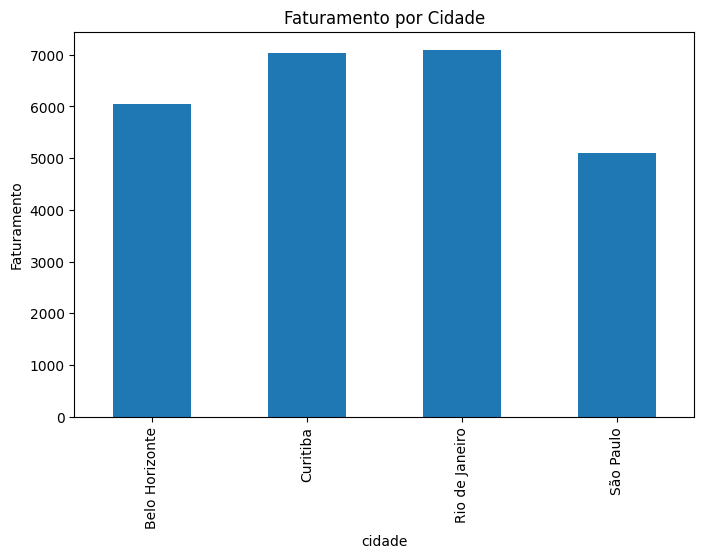

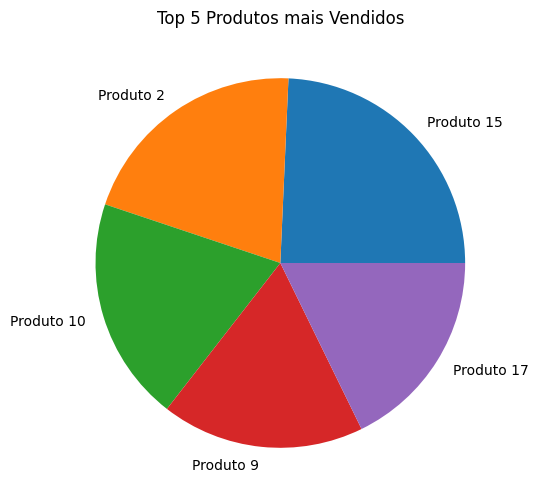

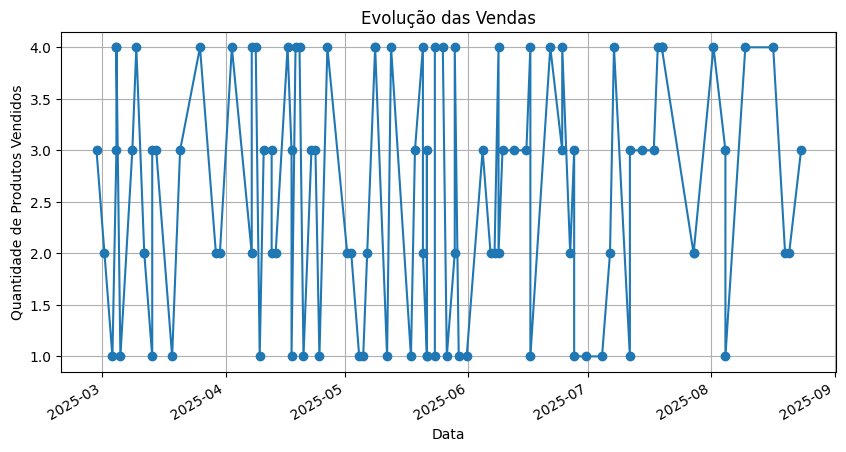

In [0]:
import matplotlib.pyplot as plt

# Faturamento por cidade
faturamento_cidade = vendas_clientes_produtos.groupby('cidade')['preco'].sum()
faturamento_cidade.plot(kind='bar', figsize=(8,5), title='Faturamento por Cidade')
plt.ylabel('Faturamento')
plt.show()

# Produtos mais vendidos (top 5)
qtd_produtos = vendas_clientes_produtos.groupby('nome_produto')['quantidade'].sum().sort_values(ascending=False).head(5)
qtd_produtos.plot(kind='pie', figsize=(6,6), title='Top 5 Produtos mais Vendidos')
plt.ylabel('')
plt.show()

# Evolução das vendas ao longo do tempo
vendas_por_data = vendas_clientes_produtos.groupby('data_venda')['quantidade'].sum()
vendas_por_data.plot(kind='line', marker='o', figsize=(10,5), title='Evolução das Vendas')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xlabel('Data')
plt.grid(True)
plt.show()

In [0]:
## CONCLUSÕES DO PROJETO

#- As categorias com maior volume de vendas foram **Eletrônicos** e **Acessórios**, mostrando forte demanda nessas áreas.  
#- A cidade que mais se destacou em volume de vendas foi **São Paulo**, seguida de **Belo Horizonte**.  
#- Alguns produtos ultrapassaram a marca de **5 vendas totais**, indicando popularidade.  
#- Criamos uma função de exportação automática para Excel, permitindo salvar as análises em um formato pronto para compartilhamento.  
#- Foi realizada também uma introdução à visualização de dados com a biblioteca **Matplotlib**, gerando gráficos para auxiliar na interpretação dos resultados.

#  Este projeto simulou um fluxo real de análise de dados: da criação/tratamento até exportação e visualização.